In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
data_bs1 = pd.read_csv('../data/preprocessed_data_BS1.csv')
data_bs1.head()

,hg38_ASF1A,hg38_CCT7,hg38_EPOR,hg38_NECAP2,hg38_LRRC8A,hg38_NDUFS8,hg38_MRPL22,hg38_HIST1H2BC,hg38_LY96,hg38_UBE2E2-AS1,...,hg38_TMEM128,hg38_ASPSCR1,hg38_CDC20,hg38_DNAJB9,hg38_OSTM1,hg38_LCNL1,hg38_PHB,hg38_LRRC29,hg38_ZFP36,Group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1,0,0,0,3,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,3,B
3,0,0,0,0,0,3,0,0,0,0,...,0,0,0,3,0,0,3,0,0,B
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [3]:
X = data_bs1.drop(['Group'], axis=1)
y = data_bs1['Group']

In [4]:
y.unique()

array(['B', 'D', 'M', 'NK', 'T'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [7]:
def model_info(y_real, y_pred, labels=['B', 'D', 'M', 'NK', 'T']):
    cm = confusion_matrix(y_real, y_pred)
    class_sums = cm.sum(axis=1)
    normalized_conf_matrix = cm / class_sums[:, np.newaxis]
    sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt='.2f')
    plt.xlabel('Predvidjene vrednosti')
    plt.ylabel('Stvarne vrednosti')
    plt.title('Matrica konfuzije')
    plt.show()

    print('Matrica konfuzije: \n', cm)
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred, average='weighted', zero_division=0))
    print('Recall score: ', recall_score(y_real, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_real, y_pred, average='weighted'))

In [8]:
def build_model(model, X_train, X_test, y_train, y_test, classes=['B', 'D', 'M', 'NK', 'T']):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    model_info(y_test, y_pred, classes)

    return model

In [9]:
from sklearn.neural_network import MLPClassifier

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'hidden_layer_sizes': [(50,), (50, 50), (50, 100, 50)],
    'alpha': [1e-5, 1e-3, 1e-1],
    'learning_rate_init': [ 1e-3, 1e-2, 1e-1],
    'max_iter': [1000],
    'batch_size': [32]
}

model = MLPClassifier(random_state=0)

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy', error_score=np.nan, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = MLPClassifier(**best_params, random_state=55)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


MLPClassifier(alpha=1e-05, batch_size=32, hidden_layer_sizes=(50,),
              max_iter=1000)

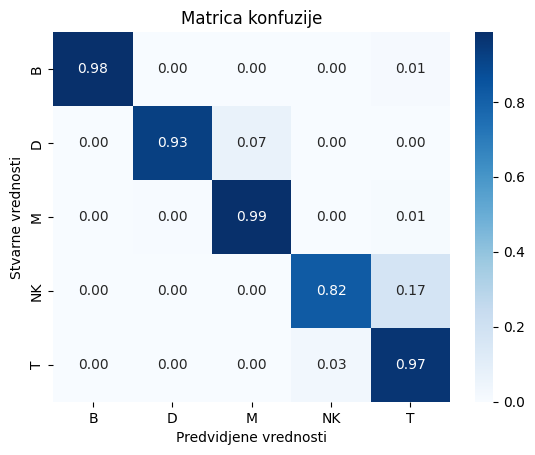

Matrica konfuzije: 
 [[ 510    1    1    0    6]
 [   0   38    3    0    0]
 [   1    2  489    0    4]
 [   1    0    0  323   68]
 [   0    0    1   85 2422]]
Accuracy score:  0.9562579013906447
Precision score:  0.957026562052681
Recall score:  0.9562579013906447
F1 score:  0.9566037325307083


MLPClassifier(alpha=1e-05, batch_size=32, hidden_layer_sizes=(50,),
              max_iter=1000)

In [33]:
build_model(best_model, X_train, X_test, y_train, y_test)

In [13]:
best_params, best_score

({'alpha': 1e-05,
  'batch_size': 32,
  'hidden_layer_sizes': (50,),
  'learning_rate_init': 0.001,
  'max_iter': 1000},
 0.9525350644622372)

In [10]:
def load_test(path, model, classes=['B', 'D', 'M', 'NK', 'T']):
    data = pd.read_csv(path)

    X = data.drop(['Group'], axis=1)
    y = data['Group']

    y_pred = model.predict(X)
    model_info(y, y_pred, labels=classes)

In [11]:
def load_and_build_model(path, params, classes=['B', 'D', 'M', 'NK', 'T']):
    data = pd.read_csv(path)
    X = data.drop(['Group'], axis=1)
    y = data['Group']
    model = MLPClassifier(**params, random_state=55)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
    build_model(model, X_train, X_test, y_train, y_test, classes=classes)

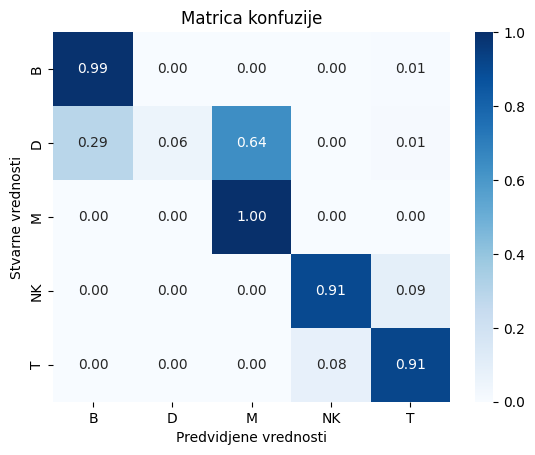

Matrica konfuzije: 
 [[1861    0    1    3   12]
 [  79   15  172    0    4]
 [   0    0 2006    0    0]
 [   0    0    0  763   79]
 [   4    0    7  599 6541]]
Accuracy score:  0.9209616334595752
Precision score:  0.9408007520712514
Recall score:  0.9209616334595752
F1 score:  0.9175181644198194


In [13]:
load_test('../data/preprocessed_data_BS2.csv', best_model)

C:\Users\bogda\AppData\Local\Temp\ipykernel_9960\1779981008.py:4: RuntimeWarning: invalid value encountered in divide
  normalized_conf_matrix = cm / class_sums[:, np.newaxis]


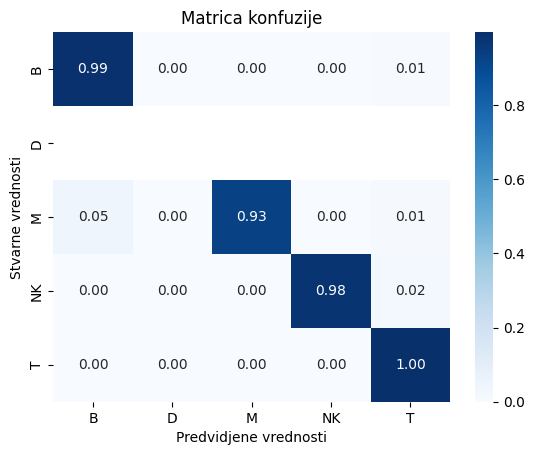

Matrica konfuzije: 
 [[ 9651     0     0     0    74]
 [    0     0     0     0     0]
 [   93     2  1726     2    25]
 [    0     0     1  8005   173]
 [   31     0     0   177 62468]]
Accuracy score:  0.9929878196729267
Precision score:  0.9930236209743728


C:\Users\bogda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score:  0.9929878196729267
F1 score:  0.9929799183864348


In [20]:
load_test('../data/preprocessed_data_10x.csv', best_model)

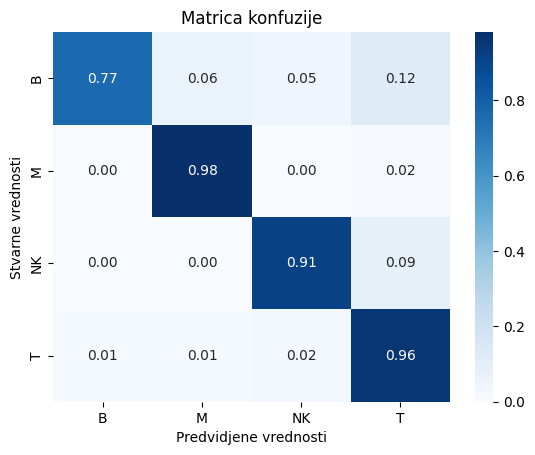

Matrica konfuzije: 
 [[ 1346   109    85   216]
 [    2   840     1    13]
 [    0     0   282    27]
 [  108   114   292 12970]]
Accuracy score:  0.9410545565376409
Precision score:  0.954269664683743
Recall score:  0.9410545565376409
F1 score:  0.944604628680259


In [15]:
load_test('../data/preprocessed_data_GEO.csv', best_model, classes=['B', 'M', 'NK', 'T'])

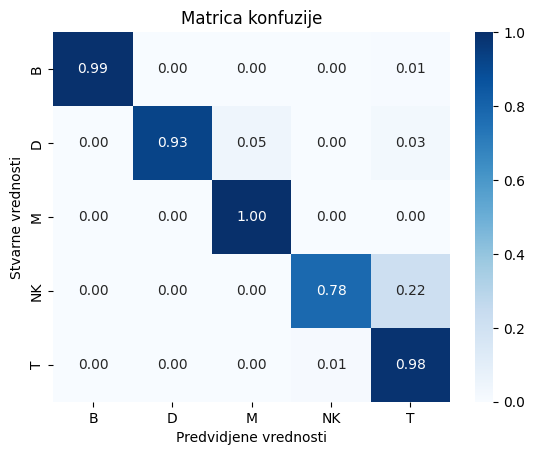

Matrica konfuzije: 
 [[ 587    0    0    1    3]
 [   0   74    4    0    2]
 [   0    0  596    0    0]
 [   0    1    0  210   59]
 [   1    0    2   29 2075]]
Accuracy score:  0.9720087815587267
Precision score:  0.9712391571658787
Recall score:  0.9720087815587267
F1 score:  0.971353033454074


In [17]:
load_and_build_model('../data/preprocessed_data_BS2.csv', best_params)

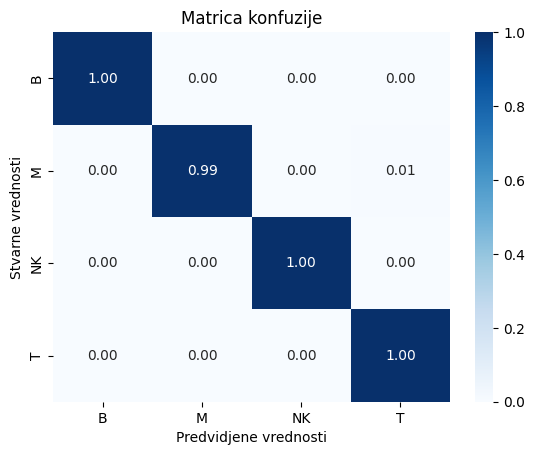

Matrica konfuzije: 
 [[ 2951     0     0     0]
 [    1   533     0     3]
 [    0     0  2414     3]
 [    2     3     2 18817]]
Accuracy score:  0.999433863075741
Precision score:  0.999433713580325
Recall score:  0.999433863075741
F1 score:  0.9994337340875046


In [18]:
load_and_build_model('../data/preprocessed_data_10x.csv', best_params, classes=['B', 'M', 'NK', 'T'])

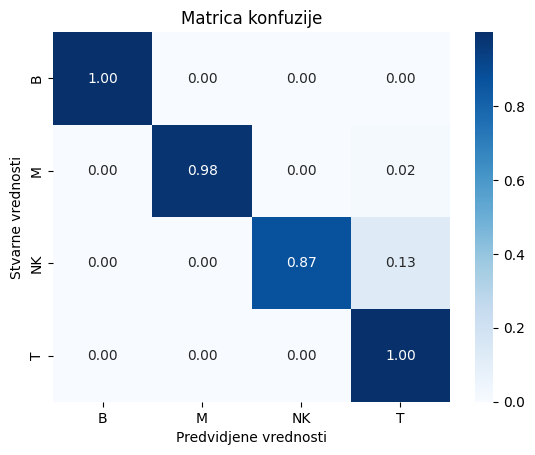

Matrica konfuzije: 
 [[ 515    0    0    1]
 [   0  258    0    5]
 [   0    0   69   10]
 [   0    0    1 4063]]
Accuracy score:  0.9965461194636327
Precision score:  0.996531951751708
Recall score:  0.9965461194636327
F1 score:  0.9964768316876131


In [19]:
load_and_build_model('../data/preprocessed_data_GEO.csv', best_params, classes=['B', 'M', 'NK', 'T'])